In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/variable_without_pca2.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [4]:
df.head()

,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,CR_DR_Usage,NPA_FLAG,LOAN_CAT1
0,0.042612,-0.048785,-0.053259,-0.134894,-0.155864,-0.075719,-0.062581,-0.023629,-0.044929,-0.056843,-0.003142,0.397017,1.805905,0.051895,0,3
1,-0.091396,-0.048785,0.066148,-0.134894,-0.297359,-0.075719,-0.050164,-0.023629,-0.044929,-0.056843,-0.010305,-0.623858,0.600067,-0.067204,0,3
2,-0.076329,-0.048785,0.031772,-0.134894,1.262271,-0.059430,-0.065534,-0.023629,-0.044929,-0.056843,-0.006337,1.417891,1.805905,-0.023470,0,0
3,-0.101346,-0.048785,0.308069,-0.134894,-0.297359,-0.075719,-0.010893,-0.023629,-0.044929,-0.056843,0.017446,-0.623858,0.198120,-0.067204,0,3
4,-0.013879,-0.048785,-0.071656,-0.134894,-0.297359,-0.075719,-0.053618,-0.023629,-0.044929,-0.056843,-0.004448,-0.623858,-0.203826,-0.067204,1,4


In [5]:
df.columns

Index(['SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'CR_DR_Usage',
       'NPA_FLAG', 'LOAN_CAT1'],
      dtype='object')

In [6]:
df.shape

(11836, 16)

In [7]:
df.isna().sum()

SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
CR_DR_Usage                  0
NPA_FLAG                     0
LOAN_CAT1                    0
dtype: int64

In [8]:
X = df.drop(columns=["LOAN_CAT1"])
Y = df["LOAN_CAT1"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [10]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=0)

# Converting train_set and test_set to dataframes
train_df = pd.DataFrame(train_set)
test_df = pd.DataFrame(test_set)

In [11]:
df_cat_0 = train_df[train_df.LOAN_CAT1==0]
df_cat_1 = train_df[train_df.LOAN_CAT1==1]
df_cat_2 = train_df[train_df.LOAN_CAT1==2]
df_cat_3 = train_df[train_df.LOAN_CAT1==3]
df_cat_4 = train_df[train_df.LOAN_CAT1==4]
df_cat_5 = train_df[train_df.LOAN_CAT1==5]
df_cat_0.shape,df_cat_1.shape,df_cat_2.shape,df_cat_3.shape,df_cat_4.shape,df_cat_5.shape

((185, 16), (2006, 16), (1246, 16), (3221, 16), (796, 16), (831, 16))

In [12]:
##### The data set is imbalanced

In [13]:

X_train = train_df.drop(columns=["LOAN_CAT1"])
y_train = train_df["LOAN_CAT1"]
X_train.shape, y_train.shape

((8285, 15), (8285,))

In [14]:
X_test = test_df.drop(columns=["LOAN_CAT1"])
y_test = test_df["LOAN_CAT1"]
X_test.shape, y_test.shape

((3551, 15), (3551,))

In [15]:
from sklearn.utils import resample

In [16]:
df_minority = train_df[train_df["LOAN_CAT1"] == 0]
df_majority_1 = train_df[train_df["LOAN_CAT1"] == 1]
df_majority_2 = train_df[train_df["LOAN_CAT1"] == 2]
df_majority_3 = train_df[train_df["LOAN_CAT1"] == 3]
df_majority_4 = train_df[train_df["LOAN_CAT1"] == 4]
df_majority_5 = train_df[train_df["LOAN_CAT1"] == 5]

##### undersampling

In [17]:
from sklearn.utils import resample
df_majority_1_downsampled = resample(df_majority_1, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_2_downsampled = resample(df_majority_2, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_3_downsampled = resample(df_majority_3, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_4_downsampled = resample(df_majority_4, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_5_downsampled = resample(df_majority_5, replace=True, n_samples=len(df_minority), random_state=42)

In [18]:
train_downsampled = pd.concat([df_minority,
                             df_majority_1_downsampled,
                             df_majority_2_downsampled,
                             df_majority_3_downsampled,
                             df_majority_4_downsampled,
                             df_majority_5_downsampled,
                             ])

In [19]:
train_downsampled["LOAN_CAT1"].value_counts()

0    185
1    185
2    185
3    185
4    185
5    185
Name: LOAN_CAT1, dtype: int64

In [20]:
X_down = train_downsampled.drop("LOAN_CAT1", axis=1)
Y_down = train_downsampled["LOAN_CAT1"]

X_down.shape, X_test.shape,Y_down.shape, y_test.shape

((1110, 15), (3551, 15), (1110,), (3551,))

In [21]:
import xgboost as xgb
xg_boost=xgb.XGBClassifier()
xg_boost.fit(X_down,Y_down)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = xg_boost.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.5829343846803717
Precision (Macro): 0.5368167478287678
Recall (Macro): 0.6051503610976038
F1 Score (Macro): 0.5378937914560203
Confusion Matrix:
[[ 44  17   6   4   0   2]
 [158 382 243  51  11   2]
 [ 31  93 319 104  24   4]
 [ 24  46 209 805 204  39]
 [  3   0  10  55 214  56]
 [  0   0   2  10  73 306]]

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.60      0.26        73
           1       0.71      0.45      0.55       847
           2       0.40      0.55      0.47       575
           3       0.78      0.61      0.68      1327
           4       0.41      0.63      0.50       338
           5       0.75      0.78      0.77       391

    accuracy                           0.58      3551
   macro avg       0.54      0.61      0.54      3551
weighted avg       0.65      0.58      0.60      3551



In [23]:
y_pred_train_XG = xg_boost.predict(X_down)

In [24]:
acc = accuracy_score(Y_down, y_pred_train_XG)
prec_macro = precision_score(Y_down, y_pred_train_XG, average='macro')
recall_macro = recall_score(Y_down, y_pred_train_XG, average='macro')
f1_macro = f1_score(Y_down, y_pred_train_XG, average='macro')
classification_rep = classification_report(Y_down,y_pred_train_XG)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_XG = confusion_matrix(Y_down, y_pred_train_XG)
print("Confusion Matrix:")
print(cf_matrix_XG )
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 1.0
Precision (Macro): 1.0
Recall (Macro): 1.0
F1 Score (Macro): 1.0
Confusion Matrix:
[[185   0   0   0   0   0]
 [  0 185   0   0   0   0]
 [  0   0 185   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0 185   0]
 [  0   0   0   0   0 185]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       185
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       185
           4       1.00      1.00      1.00       185
           5       1.00      1.00      1.00       185

    accuracy                           1.00      1110
   macro avg       1.00      1.00      1.00      1110
weighted avg       1.00      1.00      1.00      1110



In [25]:
# find important features

In [26]:
importances=xg_boost.feature_importances_

In [27]:
indices=importances.argsort()[::-1]

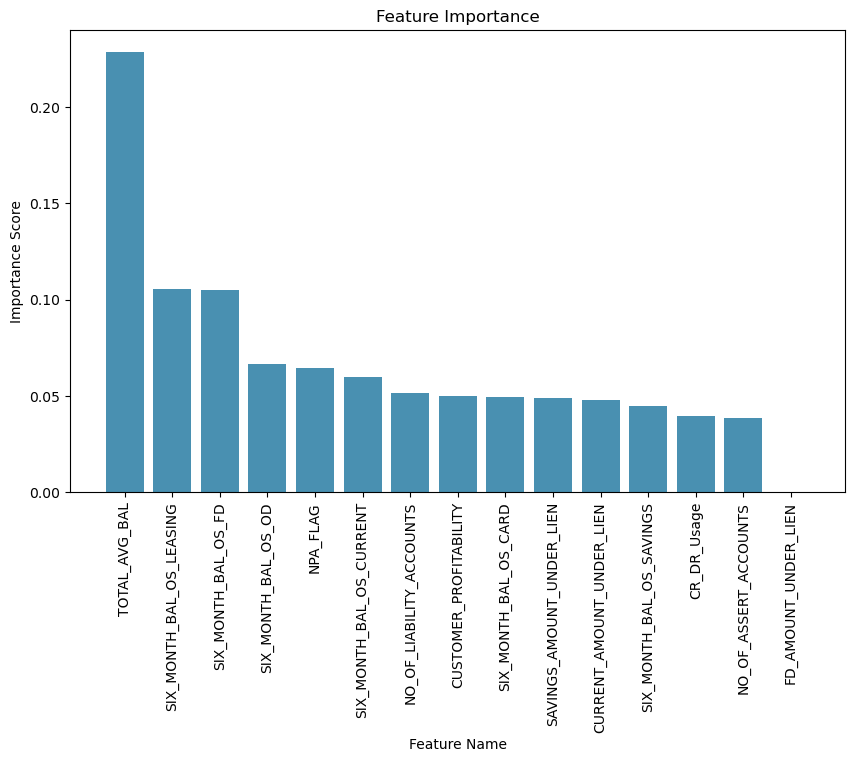

In [28]:
# Plot important Features
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(indices)),importances[indices],align="center",color='#4990b1')
plt.xticks(range(len(indices)),X.columns[indices],rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [29]:
#get top 80%  features
total_features=len(indices)
threshold=0.8
cum_importance=np.cumsum(importances[indices])
selected_index=np.argmax(cum_importance>threshold*cum_importance[-1])

selected_features=X.columns[indices[:selected_index+1]]
selected_scores=importances[indices[:selected_index+1]]

print("Top 80% important features:")
for feature,score in zip(selected_features,selected_scores):
    print(f"Feature :{feature}: Importance Score ={score:.4f}")

Top 80% important features:
Feature :TOTAL_AVG_BAL: Importance Score =0.2285
Feature :SIX_MONTH_BAL_OS_LEASING: Importance Score =0.1057
Feature :SIX_MONTH_BAL_OS_FD: Importance Score =0.1048
Feature :SIX_MONTH_BAL_OS_OD: Importance Score =0.0664
Feature :NPA_FLAG: Importance Score =0.0643
Feature :SIX_MONTH_BAL_OS_CURRENT: Importance Score =0.0599
Feature :NO_OF_LIABILITY_ACCOUNTS: Importance Score =0.0516
Feature :CUSTOMER_PROFITABILITY: Importance Score =0.0501
Feature :SIX_MONTH_BAL_OS_CARD: Importance Score =0.0496
Feature :SAVINGS_AMOUNT_UNDER_LIEN: Importance Score =0.0487


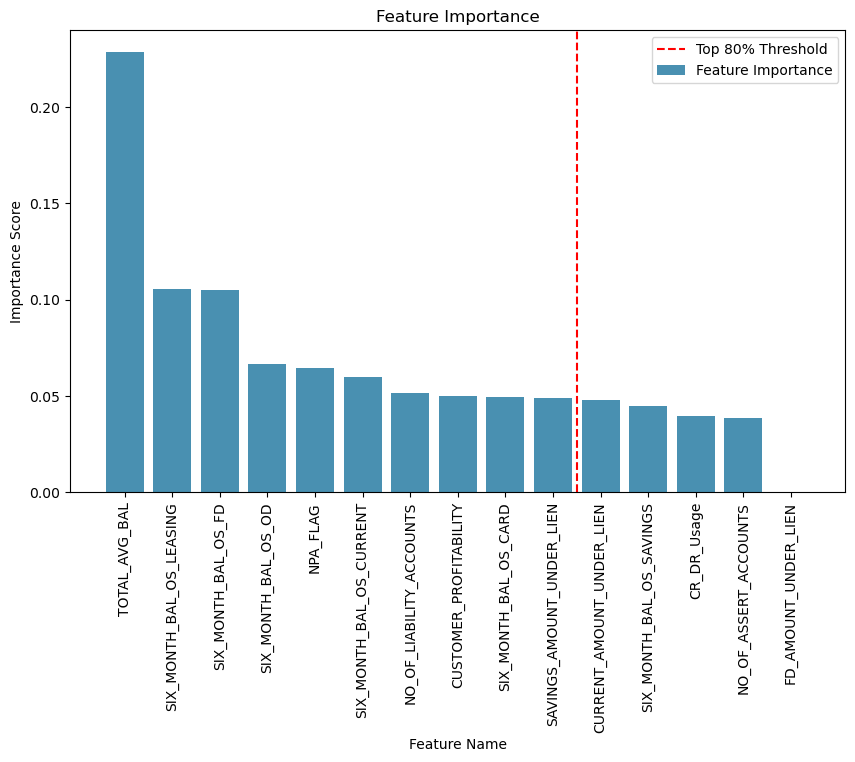

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'importances' is a numpy array containing feature importances
cumulative_importances = np.cumsum(importances[indices])

# Find the index where cumulative importance crosses 80%
threshold_index = np.argmax(cumulative_importances >= 0.8 * cumulative_importances[-1])

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(indices)), importances[indices], align="center", color='#4990b1', label='Feature Importance')
plt.axvline(x=threshold_index + 0.5, color='red', linestyle='--', label='Top 80% Threshold')
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.legend()
plt.show()